In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# LOADING INTITIAL DATASET
df=pd.read_csv("Final_Project_loan_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
# CONVERT TO DATE TIME OBJECT

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

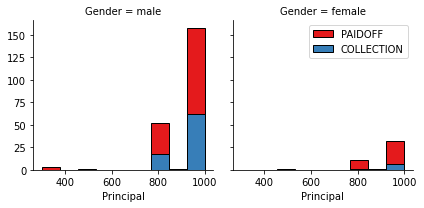

In [6]:
# PREPROCEDDING INITITAL DATASET

import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

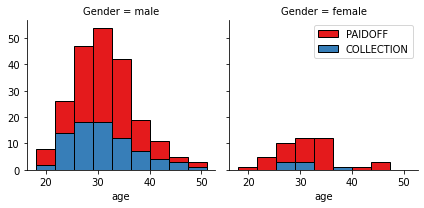

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

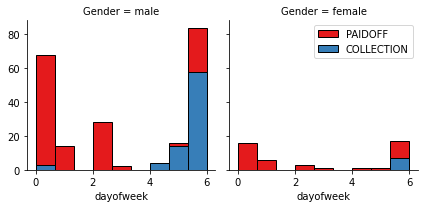

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x:1 if (x>3) else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize= True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [11]:
df['Gender'].replace(to_replace=['male','female'],value = [0,1], inplace = True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)


education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [13]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above','Bechalor'], axis=1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,0,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,1,0,1
4,1000,30,29,0,1,0,1


In [15]:
# FEATURE SET
X=Feature
X

,Principal,terms,age,Gender,weekend,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,0,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,1,0,1
4,1000,30,29,0,1,0,1
...,...,...,...,...,...,...,...
341,800,15,32,0,1,1,0
342,1000,30,25,0,1,1,0
343,800,15,39,0,0,0,1
344,1000,30,28,0,0,0,1


In [16]:
# LABEL
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [17]:
# NORMALIZATION
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.87997669,  1.14984679]])

In [18]:
# SPLITTING TRAINING DATA INTO TRAIN SET AND TEST SET

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
k=175
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=175)

In [20]:
# PREDICTING
yhat = model.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [21]:
# EVALUATION
from sklearn import metrics
print ("Train set Jaccard score:", metrics.accuracy_score(y_train, model.predict(X_train)))
print ("Initial test set Jaccard score:", metrics.accuracy_score(y_test, yhat))

Train set Jaccard score: 0.7427536231884058
Initial test set Jaccard score: 0.7857142857142857


In [22]:
# CHECKING THE BEST 'K'
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) # Train the model
    yhat = neigh.predict(X_test) # Making prediction
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) # Checking accuracy

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.6       , 0.72857143, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.68571429,
       0.7       , 0.72857143, 0.7       , 0.71428571, 0.68571429,
       0.72857143, 0.71428571, 0.71428571, 0.7       , 0.7       ,
       0.71428571, 0.7       , 0.68571429, 0.68571429, 0.74285714,
       0.68571429, 0.71428571, 0.68571429, 0.77142857, 0.67142857,
       0.77142857, 0.72857143, 0.78571429, 0.78571429, 0.78571429,
       0.75714286, 0.78571429, 0.77142857, 0.78571429, 0.77142857,
       0.75714286, 0.75714286, 0.75714286, 0.75714286, 0.75714286,
       0.75714286, 0.77142857, 0.77142857, 0.77142857, 0.77142857,
       0.77142857, 0.77142857, 0.77142857, 0.77142857, 0.77142857,
       0.77142857, 0.77142857, 0.77142857, 0.77142857, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571

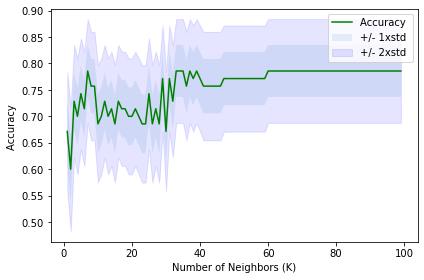

In [23]:
# PLOTTING THE ACCURACY GRAPH
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 2 * std_acc,mean_acc + 2 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 2xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [24]:
# PRINTING THE OBSERVATION
print( "The best accuracy was", mean_acc.max(),"with k=", mean_acc.argmax()+1,", 37, 39, 60, 61,...")

The best accuracy was 0.7857142857142857 with k= 7 , 37, 39, 60, 61,...


In [25]:
# LOADING THE FINAL TEST SET

test_df = pd.read_csv("Final_loan_test.csv")
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [26]:
test_df.shape

(54, 10)

In [27]:
# CONVERT TO DATE TIME OBJECT

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [28]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

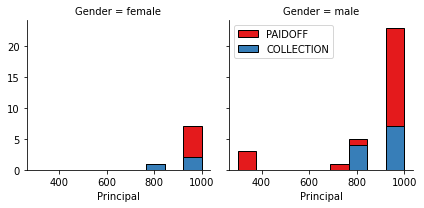

In [29]:
# PREPROCESSING FINAL DATASET

import seaborn as sns

bins = np.linspace(test_df.Principal.min(),test_df.Principal.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# People with higher principal goes into collection

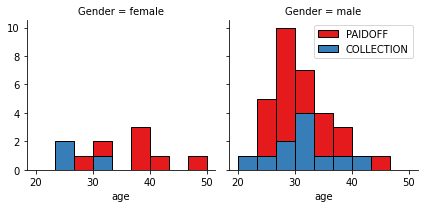

In [30]:
bins = np.linspace(test_df.age.min(),test_df.age.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Age does not turn out to be a deciding factor

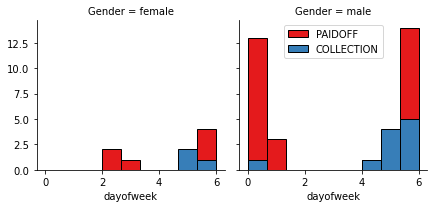

In [31]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

# Generally, loans sanctioned towards weekend went into collection

In [32]:
# CONVERTING CATEGORICAL DATA INTO NUMERIC

test_df['weekend'] = test_df['dayofweek'].apply(lambda x:1 if (x>3) else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [33]:
# OBSERVING THE EFFECT OF AGE ON LOAN STATUS

test_df.groupby(['Gender'])['loan_status'].value_counts(normalize= True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [34]:
# CONVERTING MALE TO 0 & FEMALE TO 1 (CATEORICAL INTO NUMERIC)

test_df['Gender'].replace(to_replace=['male','female'],value = [0,1], inplace = True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [35]:
# OBSERVING THE EFFECT OF EDUCATION ON LOAN STATUS

test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [36]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [37]:
# FINAL TEST SET LABEL

final_y_test = test_df['loan_status']
final_y_test[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [38]:
# FINAL TEST SET FEATURES

final_x_test = test_df[['Principal','terms','age','Gender','weekend']]
final_x_test = pd.concat([final_x_test, pd.get_dummies(test_df['education'])], axis=1)
final_x_test.drop(['Master or Above','Bechalor'], axis=1, inplace=True)
final_x_test.head()

,Principal,terms,age,Gender,weekend,High School or Below,college
0,1000,30,50,1,0,0,0
1,300,7,35,0,1,0,0
2,1000,30,43,1,1,1,0
3,1000,30,26,0,1,0,1
4,800,15,29,0,1,0,0


In [39]:
# NORMALIZATION

final_x_test = preprocessing.StandardScaler().fit(final_x_test).transform(final_x_test)
final_x_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
        -0.79772404, -0.86135677]])

In [40]:
# K-NEAREST NEIGHBOR CLASSIFIER

# BUILDING THE MODEL WITH BEST 'K'

k=37
knn_model = KNeighborsClassifier(n_neighbors=k).fit(X,y)
knn_model

KNeighborsClassifier(n_neighbors=37)

In [41]:
# PREDICTING WITH NEW MODEL

knn_y_hat = knn_model.predict(final_x_test)
knn_y_hat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [42]:
# EVALUATION OF THE MODEL 

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
print ("Jaccard score of KNN Model:",(jaccard_score(final_y_test, knn_y_hat,pos_label='PAIDOFF')))
print("f1 score of KNN Model:", f1_score(final_y_test, knn_y_hat, average = 'weighted'))

Jaccard score of KNN Model: 0.7843137254901961
f1 score of KNN Model: 0.7427039191745074


In [43]:
# DECISION TREE CLASSIFIER MODEL

# BUILDING THE MODEL

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier (criterion = 'entropy', max_depth = 4)

In [44]:
# TRAINING THE MODEL

from sklearn.model_selection import train_test_split
dtc_model = model.fit(X,y)

In [45]:
# PREDICTING WITH THE MODEL

dtc_y_hat = dtc_model.predict(final_x_test)
dtc_y_hat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [46]:
# EVALUATING THE MODEL

from sklearn.metrics import jaccard_score
print ("Jaccard Score of Decision Tree Model:",jaccard_score(final_y_test, dtc_y_hat, pos_label= "PAIDOFF"))
print("f1 score of Decision Tree:",f1_score(final_y_test, dtc_y_hat,average ='weighted'))

Jaccard Score of Decision Tree Model: 0.7647058823529411
f1 score of Decision Tree: 0.7283950617283951


In [47]:
# SUPPORT VECTOR MACHINE MODEL

  # BUILDING THE MODEL
    
    #1. Using Radial Basis Function
from sklearn import svm
svm_one = svm.SVC(kernel='rbf')
svm_one.fit(X_train, y_train)

SVC()

In [48]:
svm_one_yhat = svm_one.predict(final_x_test)
svm_one_yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION'],
      dtype=object)

In [49]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
print("f1 score with RBF function:", f1_score(final_y_test, svm_one_yhat, average = 'weighted'))
print("Jaccard score with RBF function:", jaccard_score(final_y_test, svm_one_yhat, pos_label='PAIDOFF'))

f1 score with RBF function: 0.7434343434343433
Jaccard score with RBF function: 0.76


In [50]:
    #2. Using Linear Function
svm_two = svm.SVC(kernel='linear')
svm_two.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
svm_two_yhat = svm_two.predict(final_x_test)
svm_two_yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [52]:
print("f1 score with Linear function:", f1_score(final_y_test, svm_two_yhat, average = 'weighted'))
print("Jaccard score with Linear function:", jaccard_score(final_y_test, svm_two_yhat, pos_label='PAIDOFF'))

f1 score with Linear function: 0.6304176516942475
Jaccard score with Linear function: 0.7407407407407407


In [53]:
    #3. Using Sigmoid function
svm_three = svm.SVC(kernel='sigmoid')
svm_three.fit(X, y)

SVC(kernel='sigmoid')

In [54]:
svm_three_yhat = svm_three.predict(final_x_test)
svm_three_yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [55]:
print("f1 score with Sigmoid function:", f1_score(final_y_test, svm_three_yhat, average = 'weighted'))
print("Jaccard score with Sigmoid function:", jaccard_score(final_y_test, svm_three_yhat, pos_label='PAIDOFF'))

f1 score with Sigmoid function: 0.6491417079652374
Jaccard score with Sigmoid function: 0.7169811320754716


In [56]:
    #4. Using Polynomial function
svm_four = svm.SVC(kernel='poly')
svm_four.fit(X, y)

SVC(kernel='poly')

In [57]:
svm_four_yhat = svm_four.predict(final_x_test)
svm_four_yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [58]:
print("f1 score with Polynomial function:", f1_score(final_y_test, svm_four_yhat, average = 'weighted'))
print("Jaccard score with Polynomial function:", jaccard_score(final_y_test, svm_four_yhat, pos_label='PAIDOFF'))

f1 score with Polynomial function: 0.6959228135698723
Jaccard score with Polynomial function: 0.75


In [59]:
# LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
lr_one= LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)
lr_one

LogisticRegression(C=0.01, solver='liblinear')

In [60]:
lr_one_yhat = lr_one.predict(final_x_test)
lr_one_yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [61]:
lr_one_yhat_prob = lr_one.predict_proba(final_x_test)
lr_one_yhat_prob[0:5]

array([[0.24882073, 0.75117927],
       [0.40661903, 0.59338097],
       [0.42712802, 0.57287198],
       [0.50468857, 0.49531143],
       [0.46053654, 0.53946346]])

In [62]:
from sklearn.metrics import log_loss

print("f1 score with Logistic Regression 1:", f1_score(final_y_test, lr_one_yhat, average = 'weighted'))
print("Jaccard score with Logistic Regression 1:", jaccard_score(final_y_test, lr_one_yhat, pos_label ='PAIDOFF'))
print("Log Loss with Logistic Regression Probability 1:", log_loss(final_y_test, lr_one_yhat_prob))

f1 score with Logistic Regression 1: 0.6604267310789049
Jaccard score with Logistic Regression 1: 0.7358490566037735
Log Loss with Logistic Regression Probability 1: 0.5680098945782197


In [63]:
lr_two = LogisticRegression (C=0.01, solver = 'sag').fit(X_train, y_train)
lr_two

LogisticRegression(C=0.01, solver='sag')

In [64]:
lr_two_yhat = lr_two.predict(final_x_test)
lr_two_yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [65]:
lr_two_yhat_prob = lr_two.predict_proba(final_x_test)
lr_two_yhat_prob[0:5]

array([[0.13172615, 0.86827385],
       [0.2642533 , 0.7357467 ],
       [0.26942012, 0.73057988],
       [0.34326975, 0.65673025],
       [0.30775668, 0.69224332]])

In [66]:
print("f1 score with Logistic Regression 2:", f1_score(final_y_test, lr_two_yhat, average = 'weighted'))
print("Jaccard score with Logistic Regression 2:", jaccard_score(final_y_test, lr_two_yhat, pos_label ='PAIDOFF'))
print("Log Loss with Logistic Regression Probability 2:", log_loss(final_y_test, lr_two_yhat_prob))

f1 score with Logistic Regression 2: 0.6304176516942475
Jaccard score with Logistic Regression 2: 0.7407407407407407
Log Loss with Logistic Regression Probability 2: 0.516343196270447


### REPORT OF THE MODELS ###

|Algorithm||Jaccard||F1-Score||LogLoss|
|---------||-------||--------||-------|
|KNN||0.78431||0.74270||NA|
|Decision Tree||0.76470||0.72839||NA|
|SVM|
|RBF||0.76||0.74343||NA|
|Linear||0.74074||0.63041||NA|
|Sigmoid||0.71698||0.64914||NA|
|Polynomial||0.75||0.69592||NA|
|Logistic Regression|
|LibLinear||0.66042||0.73584||0.56801|
|Sag||0.63041||0.740740||0.51034|